# **GroupBy Operations**

## **Understanding the GroupBy**

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic.info()

In [ ]:
titanic.head()

In [ ]:
titanic.tail()

In [ ]:
titanic.info()

In [ ]:
titanic_slice = titanic.iloc[:10, [2,3]]

In [ ]:
titanic_slice

In [ ]:
titanic_slice.groupby(by = 'sex')

In [ ]:
gbo = titanic_slice.groupby(by = 'sex')

In [ ]:
type(gbo)

In [ ]:
gbo.groups

In [ ]:
gbo_l = list(gbo)

In [ ]:
gbo_l[0]

In [ ]:
type(gbo_l[0])

In [ ]:
gbo_l[0][0]

In [ ]:
gbo_l[0][1]

In [ ]:
type(gbo_l[0][1])

In [ ]:
gbo_l[1][1]

#### **Another approach for achieving the same result**

In [ ]:
titanic_slice_f = titanic_slice.loc[titanic_slice.sex == 'female']

In [ ]:
titanic_slice_f

In [ ]:
titanic_slice_m = titanic_slice.loc[titanic_slice.sex == 'male']

In [ ]:
titanic_slice_m

In [ ]:
titanic_slice_m.equals(gbo_l[1][1])

In [ ]:
for element in gbo:
    print(element)

## **Splitting with many keys**

In [ ]:
import pandas as pd

In [ ]:
summer = pd.read_csv('summer.csv')

In [ ]:
summer.info()

In [ ]:
summer.head()

In [ ]:
summer.Country.nunique()

In [ ]:
split1 = summer.groupby('Country')

In [ ]:
split1_l = list(split1)

In [ ]:
len(split1_l)

In [ ]:
countries = [c[0] for c in split1_l]

In [ ]:
countries.index('BUL')

In [ ]:
split1_l[19][1]

In [ ]:
split2 = summer.groupby(by = ['Country', 'Gender'])

In [ ]:
split2_l = list(split2)

In [ ]:
split2_l[30:32]

## **Split-Apply-Combine explained**

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic_slice = titanic.iloc[:10, [2,3]]

In [ ]:
titanic_slice

In [ ]:
list(titanic_slice.groupby('sex'))[0][1]

In [ ]:
list(titanic_slice.groupby('sex'))[0][1].age.mean()

In [ ]:
list(titanic_slice.groupby('sex'))[1][1]

In [ ]:
list(titanic_slice.groupby('sex'))[1][1].age.mean()

In [ ]:
titanic_slice.groupby('sex').mean()

In [ ]:
titanic.info()

In [ ]:
titanic.groupby('sex').sum(numeric_only = True)

In [ ]:
titanic.groupby('sex').survived.sum()

In [ ]:
titanic.groupby('sex')[['fare', 'age']].max()

In [ ]:
l = list(titanic.groupby('sex'))

In [ ]:
l[0][1].age.max()

In [ ]:
l[1][1].age.max()

In [ ]:
titanic_mean = titanic.groupby('sex').mean(numeric_only = True)

In [ ]:
titanic_mean

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
plt.style.available

In [ ]:
plt.style.use("seaborn-v0_8")

In [ ]:
titanic_mean.plot(kind = 'bar', figsize = (7, 15), subplots = True)
plt.show()

## **Split-Apply-Combine applied**

In [129]:
import pandas as pd

In [130]:
summer = pd.read_csv('summer.csv')

In [131]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [132]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [133]:
summer.groupby('Country')

In [134]:
medals_by_country = summer.groupby('Country').Medal.count()

In [135]:
medals_by_country

Country
AFG      2
AHO      1
ALG     15
ANZ     29
ARG    259
      ... 
VIE      2
YUG    435
ZAM      2
ZIM     23
ZZX     48
Name: Medal, Length: 147, dtype: int64

In [136]:
top20 = medals_by_country.nlargest(20)

In [137]:
top20

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

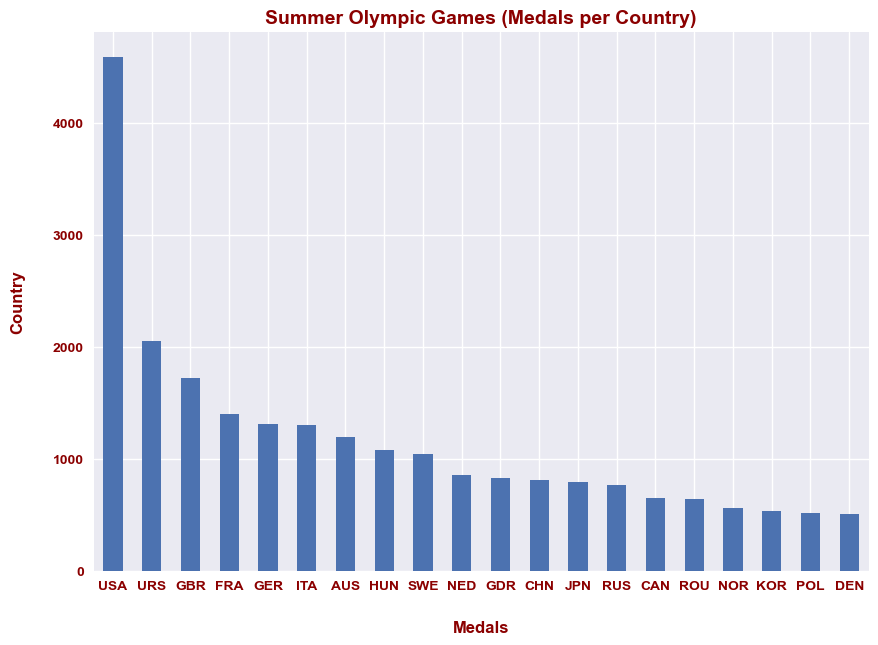

In [173]:
font_dict_common = {
    'weight': 'bold',
    'family': 'sans',
    'color': 'darkred'
}
font_dict_specific = {
    'labelpad': 20,
    'fontsize': 12
}
top20.plot(kind = 'bar', figsize = (10, 7))
plt.xlabel('Medals', **font_dict_common, **font_dict_specific)
plt.xticks(**font_dict_common, fontsize = 10, rotation = 0)
plt.ylabel('Country', **font_dict_common, **font_dict_specific)
plt.yticks(**font_dict_common, fontsize = 10)
plt.title('Summer Olympic Games (Medals per Country)', **font_dict, fontsize = 14)
plt.show()

In [140]:
titanic = pd.read_csv('titanic.csv')

In [141]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [142]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [143]:
titanic.groupby('pclass').fare.mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [144]:
titanic.groupby('sex').survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [145]:
titanic.groupby('pclass').survived.mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [146]:
titanic['ad_chi'] = 'adult'

In [147]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult
5,0,3,male,NaN,0,0,8.4583,Q,NaN,adult
6,0,1,male,54.0,0,0,51.8625,S,E,adult
7,0,3,male,2.0,3,1,21.0750,S,NaN,adult
8,1,3,female,27.0,0,2,11.1333,S,NaN,adult
9,1,2,female,14.0,1,0,30.0708,C,NaN,adult


In [148]:
titanic.loc[titanic.age < 18, 'ad_chi'] = 'child'

In [149]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult
5,0,3,male,NaN,0,0,8.4583,Q,NaN,adult
6,0,1,male,54.0,0,0,51.8625,S,E,adult
7,0,3,male,2.0,3,1,21.0750,S,NaN,child
8,1,3,female,27.0,0,2,11.1333,S,NaN,adult
9,1,2,female,14.0,1,0,30.0708,C,NaN,child


In [150]:
titanic.ad_chi.value_counts()

ad_chi
adult    778
child    113
Name: count, dtype: int64

In [151]:
titanic.groupby('ad_chi').survived.mean()

ad_chi
adult    0.361183
child    0.539823
Name: survived, dtype: float64

In [152]:
titanic.groupby(['sex', 'ad_chi']).survived.count()

sex     ad_chi
female  adult     259
        child      55
male    adult     519
        child      58
Name: survived, dtype: int64

In [153]:
titanic.groupby(['sex', 'ad_chi']).survived.mean()

sex     ad_chi
female  adult     0.752896
        child     0.690909
male    adult     0.165703
        child     0.396552
Name: survived, dtype: float64

In [154]:
survival_rate = titanic.groupby(['sex', 'ad_chi']).survived.mean().sort_values(ascending = False)

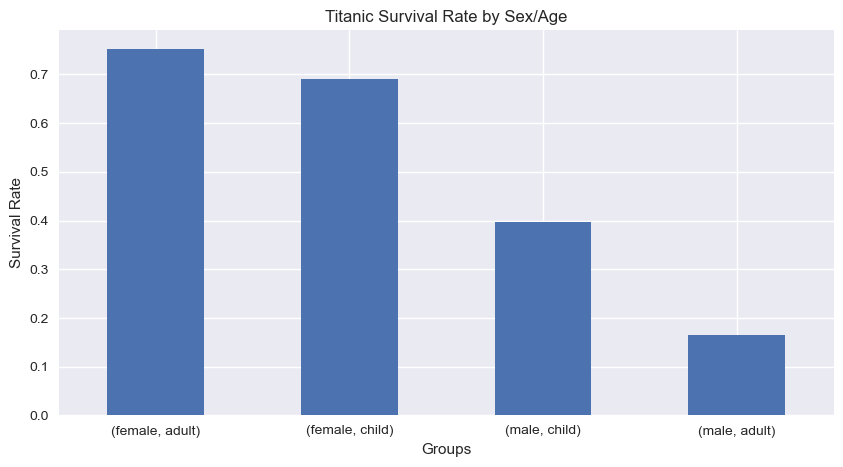

In [172]:
survival_rate.plot(kind = 'bar', figsize = (10, 5))
plt.title('Titanic Survival Rate by Sex/Age')
plt.xlabel('Groups')
plt.xticks(rotation = 0)
plt.ylabel('Survival Rate')
plt.show()